#В этом Мини-ДЗ Вам предстоит предсказать цену на нефть марки Brent используя библиотеку Prophet!

Скачаем данные: https://drive.google.com/file/d/1f9jCLp4BfmJGC-FZdvTUA9OexaiV_35I/view?usp=sharing

In [30]:
!gdown --id 1f9jCLp4BfmJGC-FZdvTUA9OexaiV_35I

Downloading...
From: https://drive.google.com/uc?id=1f9jCLp4BfmJGC-FZdvTUA9OexaiV_35I
To: /content/oil.csv
100% 20.6k/20.6k [00:00<00:00, 27.4MB/s]


In [65]:
import pandas as pd

df = pd.read_csv('oil.csv')
df

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


# Задание 1. (1 б.)
Переименуйте колонки с временем и данными в названия, требуемые "пророку" 

In [66]:
df = df.rename(columns={
    'date': 'ds',
    'dcoilwtico': 'y'
    })
df

,ds,y
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [67]:
df['ds'].iloc[0]

'2013-01-01'

In [68]:
df_new = df.copy(deep=True)

In [69]:
df_new['ds'] = pd.to_datetime(df_new['ds'])

In [70]:
df_new['ds'].iloc[0]

Timestamp('2013-01-01 00:00:00')

In [71]:
df_new.set_index('ds', inplace=True)
df_new

,y
ds,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


In [72]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

# Задание 2. (1 б.)
Инициализируйте Prophet

In [73]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Задание 3 (1 б.)
Создйте датафрейм-заготовку с будущими датами на полгода вперёд

In [74]:
future = m.make_future_dataframe(periods=365)
future

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-07
...,...
1578,2018-08-27
1579,2018-08-28
1580,2018-08-29
1581,2018-08-30


# Задание 4 (1 б.)
Выполнете предсказание

In [75]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1578,2018-08-27,45.865220,17.673543,75.441507
1579,2018-08-28,46.084856,17.410492,75.429114
1580,2018-08-29,46.228282,18.299284,75.847609
1581,2018-08-30,46.414981,16.661930,76.010927
1582,2018-08-31,46.481587,18.429915,76.349613


#Задание 5 (1 б.)
Выведете результат предсказания с помощью plotly

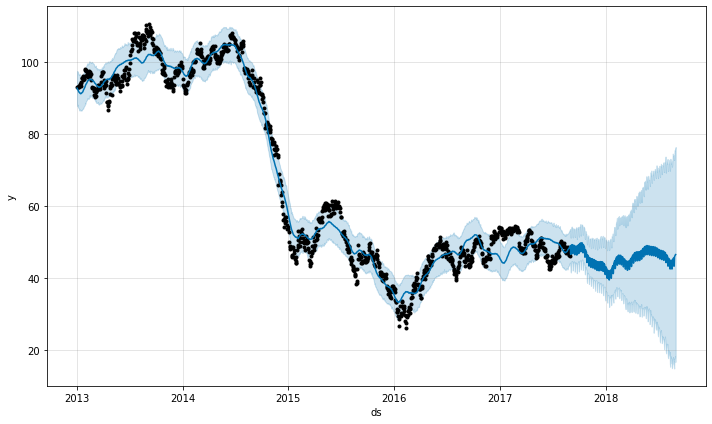

In [76]:
fig1 = m.plot(forecast)

In [77]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

# Задание 6 (необязательное, 0 б.)
Найдите в интернете исторические графики цены на нефть и сравните с предсказанием. Есть ли сходство?

Будет еще пару пиков, можно с играть на повышение, но к Июню лучше расподать активы дабы зафиксировать прибыль, далее купить в январе по низкой цене.


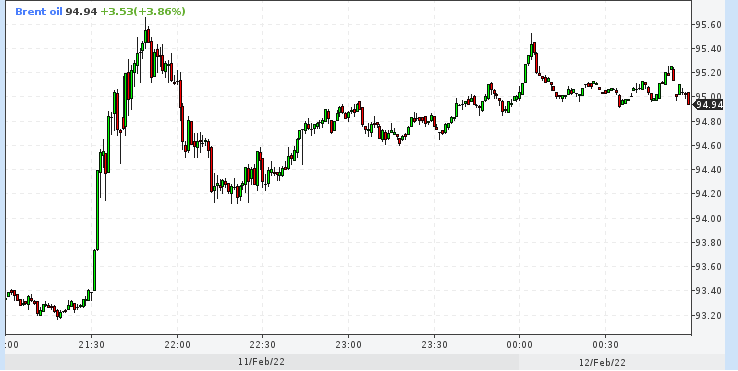

In [80]:
from IPython.display import Image
print('Будет еще пару пиков, можно с играть на повышение, но к \
Июню лучше расподать активы дабы зафиксировать прибыль, далее купить в январе по низкой цене.')
display(Image('нефть.png'))
plot_plotly(m, forecast)